# Plotting 2

In [65]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [66]:
import pandas as pd
from pandas import DataFrame, Series

import sqlite3
import os

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

matplotlib.rcParams["font.size"] = 15

### How do you plot a *bar chart* from a *pandas series*?

In [67]:
#Series.plot.bar()

### What are the *axes* for a *bar chart*?

In [68]:
# index  => x-axis
# values => y-axis

## Continuing scatter plot example from Plotting 1 lecture

In [69]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
df = DataFrame(trees)
df.head()

,age,diameter,height
0,1,0.8,1.5
1,1,1.2,1.9
2,1,1.4,1.8
3,2,0.9,1.8
4,2,1.5,2.5


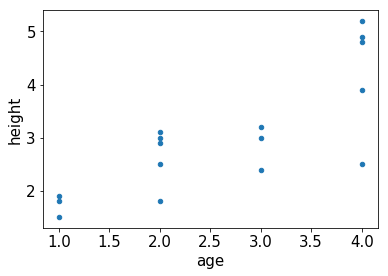

In [70]:
df.plot.scatter(x="age", y="height")

### What are some aspects of scatter plots that you can control with different variables? 
1. *X-axis*: age
2. *Y-axis*: height
3. *Color of plot points*
4. *Size of plot points*: diameter
5. *Shape of plot points*

### How to vary *color* of plot points?

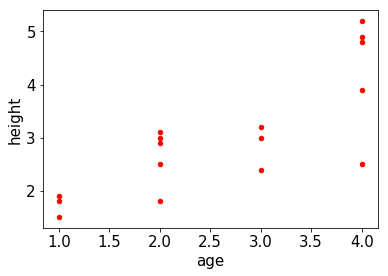

In [71]:
df.plot.scatter(x="age", y="height", color="r")

### How to vary *size* of plot points?

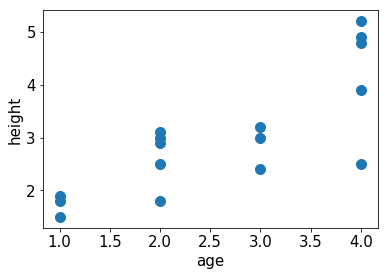

In [72]:
df.plot.scatter(x="age", y="height", s=100)

### How to vary *shape* of plot points?

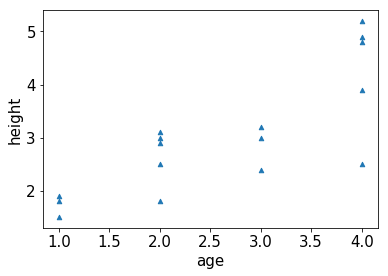

In [73]:
df.plot.scatter(x="age", y="height", marker="^")

### How do we add *tree diameter* data to this *scatter plot*?

In [74]:
# df.plot.scatter(x="age", y="height", s="diameter") 
# Doesn't work because size parameter expects a series!

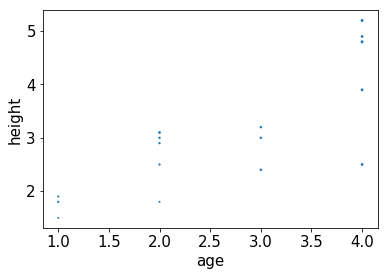

In [75]:
df.plot.scatter(x="age", y="height", s=df["diameter"])

In [76]:
df["diameter"] * 25

0      20.0
1      30.0
2      35.0
3      22.5
4      37.5
5      45.0
6      42.5
7      52.5
8      50.0
9      55.0
10     72.5
11     77.5
12     77.5
13     70.0
14     87.5
15    100.0
Name: diameter, dtype: float64

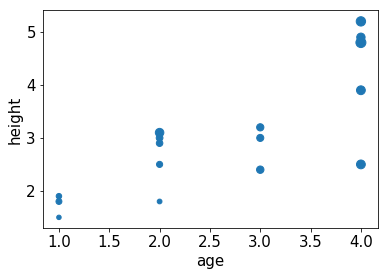

In [77]:
df.plot.scatter(x="age", y="height", s=df["diameter"] * 25)

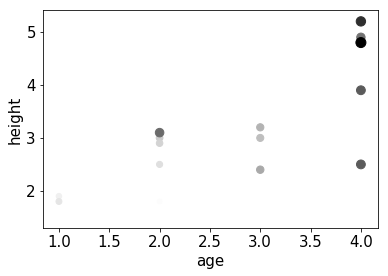

In [78]:
# Not recommended: don't use same variable to represent multiple aspects of the plot!
# Dummy example
df.plot.scatter(x="age", y="height", s=df["diameter"] * 25, c=df["diameter"])

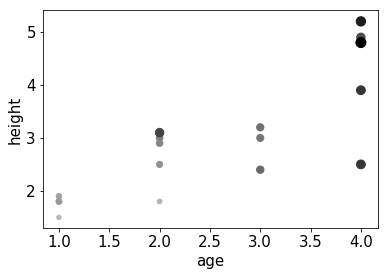

In [79]:
# Not recommended: don't use same variable to represent multiple aspects of the plot!
# Dummy example
df.plot.scatter(x="age", y="height", s=df["diameter"] * 25, c=df["diameter"],
               vmin = df["diameter"].min()-2)

## IRIS dataset: http://archive.ics.uci.edu/ml/datasets/iris

In [80]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [81]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=["sep-len", "sep-wid", "pet-len", "pet-width", "class"])
df.head()

,sep-len,sep-wid,pet-len,pet-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
df.tail()

,sep-len,sep-wid,pet-len,pet-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### How do we create a *scatter plot* for various *class types*?

In [83]:
classes = set(df["class"])
classes

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

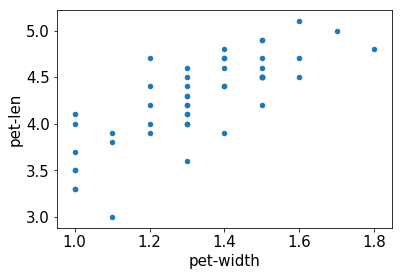

In [84]:
df[df["class"] == "Iris-versicolor"].plot.scatter(x = "pet-width", y = "pet-len")

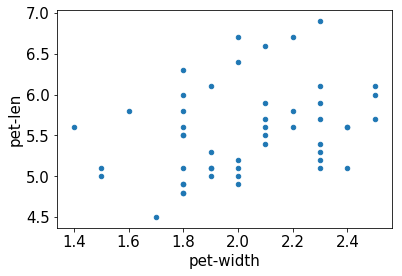

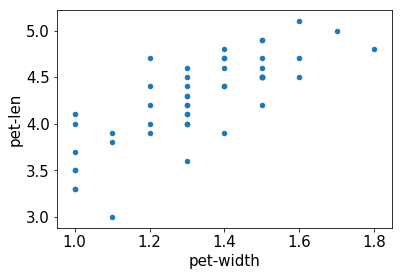

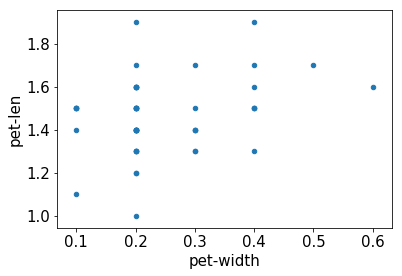

In [85]:
for variety in classes:
    df[df["class"] == variety].plot.scatter(x = "pet-width", y = "pet-len")

### When we call a plotting function, like scatter
1. RULE 1: if AxesSuplot ax passed, then plot in that subplot
2. RULE 2: if ax is None, create a new AxesSubplot
3. RULE 3: return AxesSuplot that was used

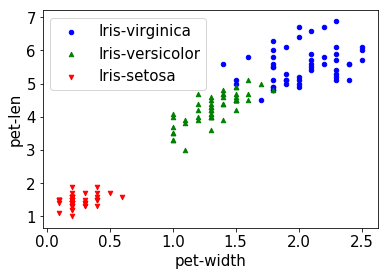

In [86]:
plot_area = None
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]
for variety in classes:
    sub_df = df[df["class"] == variety]
    plot_area = sub_df.plot.scatter(x="pet-width", y="pet-len",
                                    ax=plot_area, color=colors.pop(0),
                                    label=variety, marker=markers.pop(0))

## Line plots

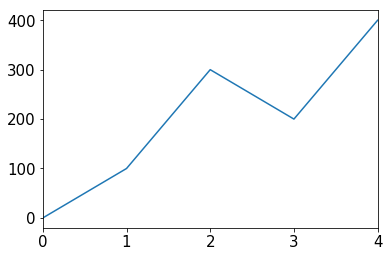

In [88]:
s = Series([0, 100, 300, 200, 400])
s.plot.line()

In [89]:
s = Series([0, 100, 300, 200, 400], index=[0, 1, 20, 21, 22])
s

0       0
1     100
20    300
21    200
22    400
dtype: int64

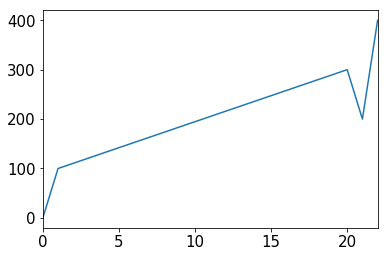

In [90]:
s.plot.line()

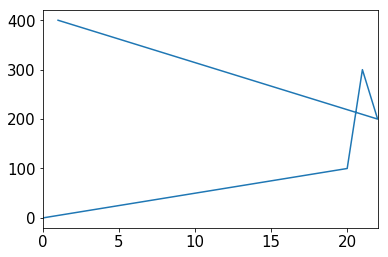

In [91]:
s = Series([0, 100, 300, 200, 400], index=[0, 20, 21, 22, 1])
s.plot.line()

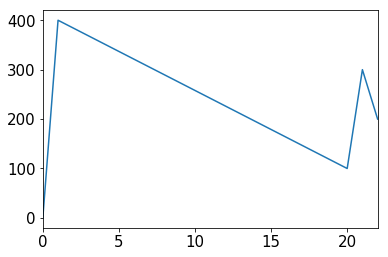

In [92]:
s.sort_index().plot.line()

### Temperature dataset line plot

In [93]:
df = DataFrame({
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})
df

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46
5,78,56
6,82,61
7,79,59
8,72,50
9,59,39


Text(0, 0.5, 'Temp (Fahrenheit)')

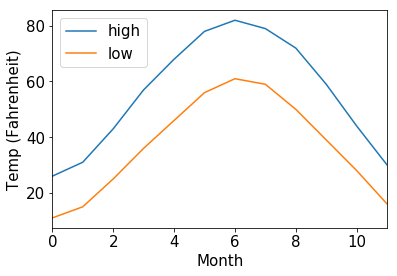

In [95]:
ax = df.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fahrenheit)")

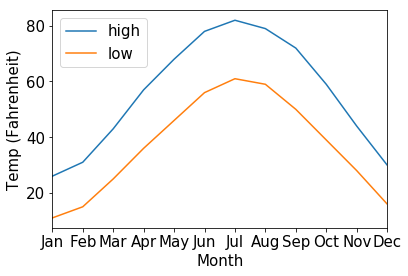

In [97]:
ax = df.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fahrenheit)")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax.set_xticks(range(12))
None

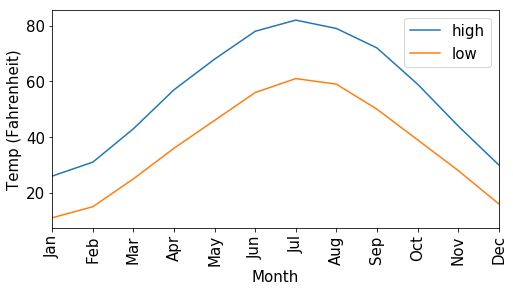

In [100]:
ax = df.plot.line(figsize = (8, 4)) # Option 1: control figsize to space out
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fahrenheit)")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
ax.set_xticks(range(12))
None

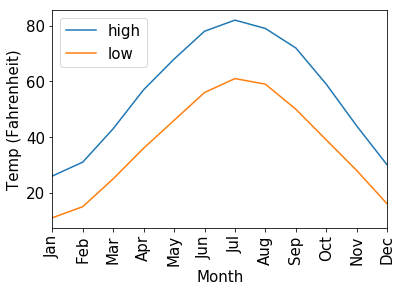

In [101]:
ax = df.plot.line() # Option 2: rotate x-tick labels
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fahrenheit)")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
ax.set_xticks(range(12))
None

### Convert temperature to *celcius*

In [106]:
celcius = (df - 32) / (212 - 32) * 100
celcius.head()

,high,low
0,-3.333333,-11.666667
1,-0.555556,-9.444444
2,6.111111,-3.888889
3,13.888889,2.222222
4,20.000000,7.777778


In [107]:
celcius["freezing"] = 0
celcius

,high,low,freezing
0,-3.333333,-11.666667,0
1,-0.555556,-9.444444,0
2,6.111111,-3.888889,0
3,13.888889,2.222222,0
4,20.000000,7.777778,0
5,25.555556,13.333333,0
6,27.777778,16.111111,0
7,26.111111,15.000000,0
8,22.222222,10.000000,0
9,15.000000,3.888889,0


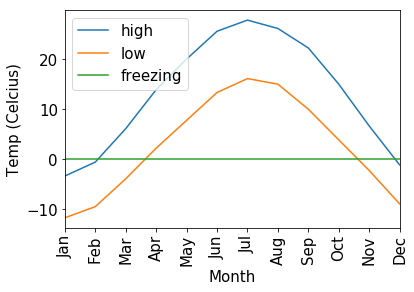

In [108]:
ax = celcius.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Celcius)")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
ax.set_xticks(range(12))
None

# Stock Market Example

In [109]:
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


### How much *current wealth (2018)* would we have given we had invested *1000$ in 1970*?

In [111]:
df["tot"] = df["return"].cumprod()
df.tail()

,year,return,tot,wealth
44,2014,1.1369,88.439335,88439.334579
45,2015,1.0138,89.659797,89659.797397
46,2016,1.1196,100.383109,100383.109165
47,2017,1.2183,122.296742,122296.741896
48,2018,0.9557,116.878996,116878.996230


In [110]:
starting = 1000
df["tot"] = df["return"].cumprod()
df["wealth"] = df["tot"] * starting
df.set_index("year").tail()

,return,tot,wealth
year,,,
2014,1.1369,88.439335,88439.334579
2015,1.0138,89.659797,89659.797397
2016,1.1196,100.383109,100383.109165
2017,1.2183,122.296742,122296.741896
2018,0.9557,116.878996,116878.996230


Text(0, 0.5, 'Wealth ($)')

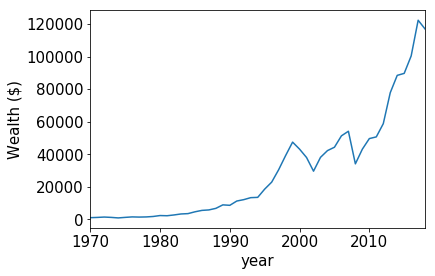

In [112]:
ax = df.set_index("year")["wealth"].plot.line()
ax.set_ylabel("Wealth ($)")